In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf

In [6]:
df = pd.read_csv('realistic_attempt.csv',on_bad_lines='skip')

In [7]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df.columns = df.iloc[0]
df = df[1:]
df = df.iloc[:,:-1]
df = df.astype(float)
df = normalize(df)

In [8]:
df = df['IPC (Sys + User)']

/tmp/ipykernel_55776/260782251.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(len(df.diff()[1:])),df.diff()[1:])


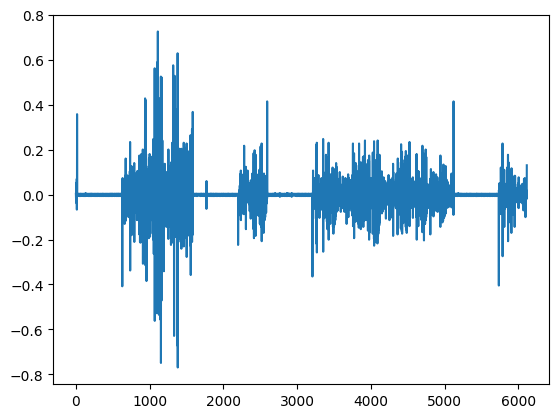

In [9]:
plt.plot(np.arange(len(df.diff()[1:])),df.diff()[1:])

/tmp/ipykernel_55776/3536426520.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  acf_vals = acf(df.diff()[1:])


<BarContainer object of 38 artists>

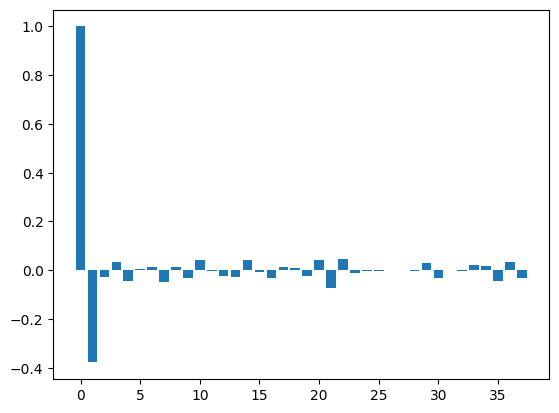

In [12]:
acf_vals = acf(df.diff()[1:])
plt.bar(np.arange(len(acf_vals)), acf_vals)

/tmp/ipykernel_55776/1140043647.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pacf_vals = pacf(df.diff()[1:])


<BarContainer object of 38 artists>

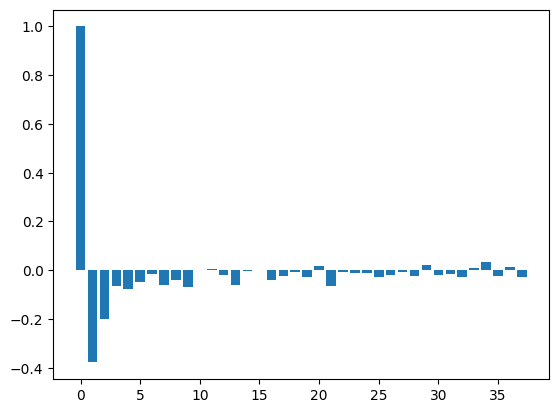

In [13]:
pacf_vals = pacf(df.diff()[1:])
plt.bar(np.arange(len(pacf_vals)), pacf_vals)

In [14]:
len(df)

6115

In [17]:
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df[:4000],order=(1,0,2))
fit_model = model.fit()


/tmp/ipykernel_55776/2346004145.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model = ARIMA(df[:4000],order=(1,0,2))


In [18]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       IPC (Sys + User)   No. Observations:                 4000
Model:                 ARIMA(1, 0, 2)   Log Likelihood                5194.694
Date:                Fri, 30 Jun 2023   AIC                         -10379.389
Time:                        00:22:05   BIC                         -10347.919
Sample:                             0   HQIC                        -10368.233
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3225      0.029     11.231      0.000       0.266       0.379
ar.L1          0.9804      0.003    297.723      0.000       0.974       0.987
ma.L1         -0.4462      0.005    -83.122      0.000      -0.457      -0.436
ma.L2         -0.0204      0.008     -2.624      0.009      -0.036      -0.005
sigma2         0.0044   3.35e-05    129.886      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             99498.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# fit_model.predict(df[4000:])

predictions = fit_model.predict(start=3000, end=6115)
residuals = df[3000:6115] - predictions

/tmp/ipykernel_55776/3922403709.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  residuals = df[3000:6115] - predictions


/tmp/ipykernel_55776/1940389160.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(df[3000:6115])


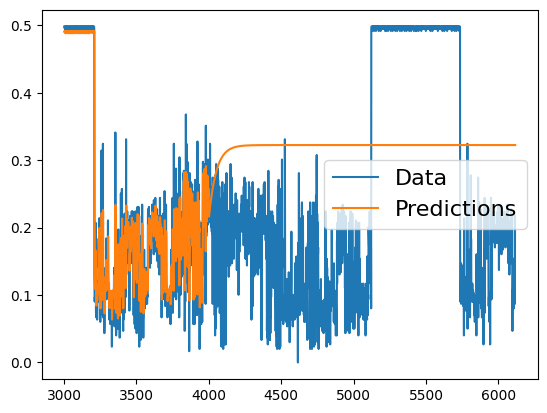

In [30]:
plt.plot(df[3000:6115])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

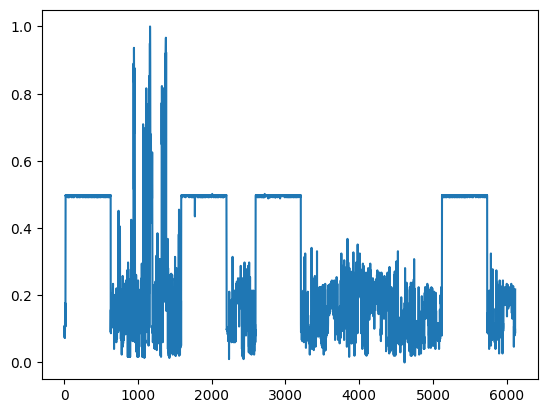

In [28]:
plt.plot(df)

In [25]:
len(df)

6115